In [14]:
import pandas as pd 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [15]:
df = pd.read_csv('Assets\salaries.csv')
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [16]:
X = df.drop('salary_more_then_100k', axis=1)

In [17]:
X

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors
5,google,computer programmer,masters
6,abc pharma,sales executive,masters
7,abc pharma,computer programmer,bachelors
8,abc pharma,business manager,bachelors
9,abc pharma,business manager,masters


In [18]:
y = df['salary_more_then_100k']
y

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [19]:
X = pd.get_dummies(X, dtype= int)

In [20]:
X

,company_abc pharma,company_facebook,company_google,job_business manager,job_computer programmer,job_sales executive,degree_bachelors,degree_masters
0,0,0,1,0,0,1,1,0
1,0,0,1,0,0,1,0,1
2,0,0,1,1,0,0,1,0
3,0,0,1,1,0,0,0,1
4,0,0,1,0,1,0,1,0
5,0,0,1,0,1,0,0,1
6,1,0,0,0,0,1,0,1
7,1,0,0,0,1,0,1,0
8,1,0,0,1,0,0,1,0
9,1,0,0,1,0,0,0,1


In [39]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
dt = DecisionTreeClassifier(criterion='entropy')

In [40]:
dt.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

In [41]:
y_pred = dt.predict(X)

In [42]:
y_pred

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

1.0

In [44]:

# Is salary of google, computer engineer, bachelors degree > 100k?
dt.predict([[0,0,1,0,1,0,1,0]])

#Model working fine as per condition in the dataset

array([0], dtype=int64)

In [45]:
# Is salary of google, computer engineer, masters degree > 100k?

dt.predict([[0,0,1,0,1,0,0,1]])

#Model working fine as per condition in the dataset


array([1], dtype=int64)

In [46]:
dt.predict([[0,1,0,0,1,0,0,1]])  #Facebook have yes as per dataset so that if there is one in second column output will be always 1.


array([1], dtype=int64)

In [47]:
feature = X.columns
feature

Index(['company_abc pharma', 'company_facebook', 'company_google',
       'job_business manager', 'job_computer programmer',
       'job_sales executive', 'degree_bachelors', 'degree_masters'],
      dtype='object')

In [48]:
target = ['salary_more_then_100k']
target

['salary_more_then_100k']

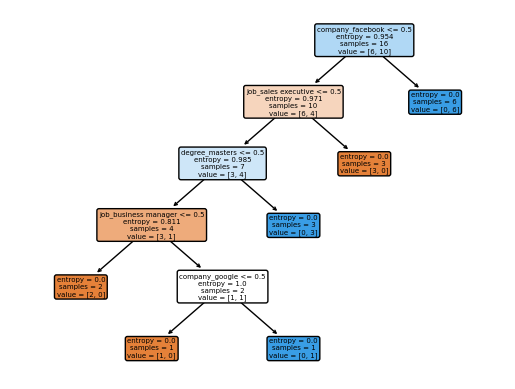

In [55]:
import matplotlib.pyplot as plt
plt.Figure(figsize=(50,55))
plot_tree(dt,feature_names=feature,
          rounded= True,filled= True,fontsize=5)
plt.show()